<a href="https://colab.research.google.com/github/adammoss/MLiS2/blob/master/workshops/workshop1/question4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is the solution to question 4 of workshop 1. The changes required to the example in lectures are to (1) add an additional hidden layer to the MLP (2) implement the back-propagation equations derived in questions 3 

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
np.random.seed(0)

In [338]:
X = np.array([[0,0], [0,1], [1,0], [1,1]])
print(X)

[[0 0]
 [0 1]
 [1 0]
 [1 1]]


In [339]:
Y = np.array([[0], [1], [1], [0]])
print(Y)

[[0]
 [1]
 [1]
 [0]]


In [0]:
class MLP(object):

  def __init__(self):
    # Initialise with random weights
    self.weights_1 = 0.1 * np.random.normal(size=(3,2))
    self.weights_2 = 0.1 * np.random.normal(size=(3,2))
    self.weights_3 = 0.1 * np.random.normal(size=(3,1))

  def forward(self, x):
    # Do a forward pass
    if len(x.shape) == 1:
      # Single example, so add a batch dimension of 1
      x = np.expand_dims(x, axis=0)
    # First hidden layer 
    z_1 = np.matmul(np.hstack((np.ones(shape=(x.shape[0], 1)), x)), self.weights_1)
    # Apply ReLU activation function
    a_1 = np.maximum(z_1, 0)
    # Second hidden layer 
    z_2 = np.matmul(np.hstack((np.ones(shape=(a_1.shape[0], 1)), a_1)), self.weights_2)
    # Apply ReLU activation function
    a_2 = np.maximum(z_2, 0)
    # Output layer
    z_3 = np.matmul(np.hstack((np.ones(shape=(a_2.shape[0], 1)), a_2)), self.weights_3)
    # Linear activation 
    a_3 = z_3
    return z_1, a_1, z_2, a_2, z_3, a_3

In [0]:
num_epochs = 1000
learning_rate = 0.1

In [342]:
m = MLP()
loss_history = []
weights_1_history = []
weights_2_history = []
weights_3_history = []
for epoch in range(num_epochs):
  # Do forward pass
  z_1, a_1, z_2, a_2, z_3, a_3 = m.forward(X)
  loss = 0.25 * np.sum((a_3 - Y)**2)
  loss_history.append(loss)
  if epoch % 100 == 0:
    print(epoch, loss)
  # Delta_2 has shape(4, 1), the first dimension being the batch dimension
  delta_3 = 0.5 * ( a_3 - Y)
  g_prime_2 = np.heaviside(z_2, 0)
  # Delta_2 has shape (4, 2)
  delta_2 = np.matmul(delta_3, m.weights_3[1:3, :].T) * g_prime_2
  g_prime_1 = np.heaviside(z_1, 0)
  # Delta_1 has shape (4, 2)
  delta_1 = np.matmul(delta_2, m.weights_2[1:3, :].T) * g_prime_1
  m.weights_1[0, :] -= learning_rate * np.sum(delta_1[:, :], axis=0)
  m.weights_1[1:3, :] -= learning_rate * np.matmul(X.T, delta_1)
  m.weights_2[0, :] -= learning_rate * np.sum(delta_2[:, :], axis=0)
  m.weights_2[1:3, :] -= learning_rate * np.matmul(a_1.T, delta_2)
  m.weights_3[0, :] -= learning_rate * np.sum(delta_3[:, :], axis=0)
  m.weights_3[1:3, :] -= learning_rate * np.matmul(a_2.T, delta_3)
  weights_1_history.append(np.copy(m.weights_1))
  weights_2_history.append(np.copy(m.weights_2))
  weights_3_history.append(np.copy(m.weights_3))

0 0.4280649156817096
100 0.24958289438525927
200 0.24846815327427169
300 0.24291990014564294
400 0.19908089180191763
500 0.15441785203429964
600 0.001290305960575991
700 1.378554177405476e-08
800 1.029769258678844e-13
900 1.069274286767211e-18


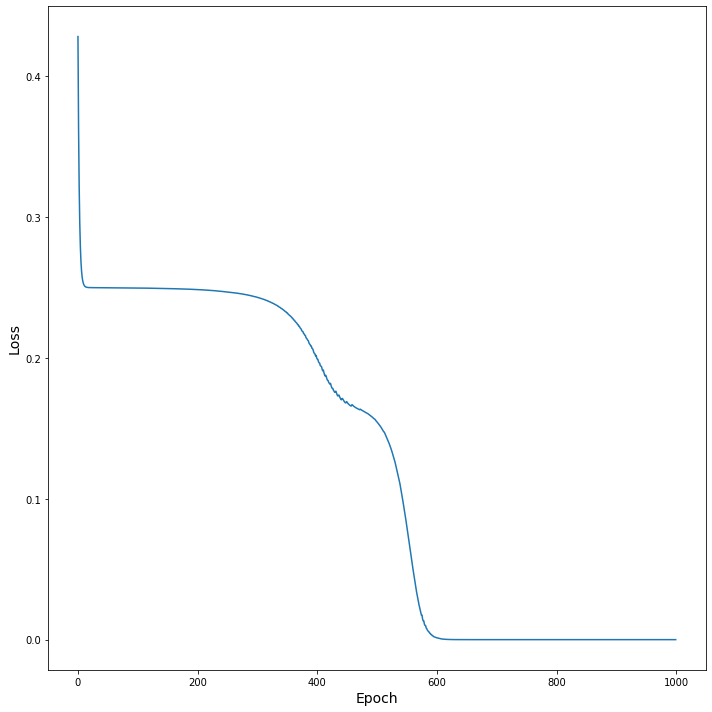

In [343]:
plt.figure(figsize=(10, 10))
ax = plt.subplot(1, 1, 1)
ax.plot(loss_history[:])
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('Loss', fontsize=14)
plt.tight_layout()
plt.show()

In [344]:

z_1, a_1, z_2, a_2, z_3, a_3 = m.forward(X)
print(a_3)

[[3.50693733e-12]
 [1.00000000e+00]
 [1.00000000e+00]
 [3.50693733e-12]]
